In [1]:
import numpy as np
from nptyping import NDArray
import random
import numpy.linalg as LA
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional, Any, Callable
from PIL import Image
import os
import json

In [2]:
from utils import load_image_to_arr, display_rgb, SVD2D
import dim_reduction
from spectral_data import ImageSpectralData
dim_reduction.init_basis_cache()
import cityscapes_helper
from dataset_creation import (
    MultiScaleImageSampler, 
    ImageChunkSummarizerOptions, 
    MultiScaleImageEncoder, 
    MultiScaleImageDecoder, 
    ImageAtScale, 
    CityscapesDatasetFactory, 
    CityScapesDataset
)
from cityscapes_helper import format_semantic_composition

In [3]:
cityscapes_helper.set_visual_data_zip_path(r"C:\Users\Ben\Downloads\leftImg8bit_trainvaltest.zip")
cityscapes_helper.set_semantic_data_zip_path(r"C:\Users\Ben\Downloads\gtFine_trainvaltest.zip")
cityscapes_helper.initialize_tool()

0.npy
(1001, 30)
(1001, 680)


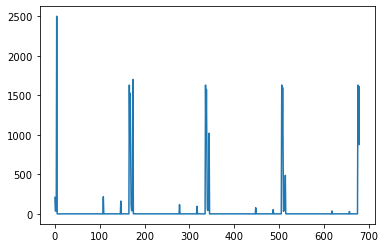

In [4]:
demo_dataset = CityScapesDataset("mini_dataset_1001")
demo_dataset.load()
print(demo_dataset.labels.shape)
print(demo_dataset.features.shape)
sample_feature = demo_dataset.features[20]
fig, ax = plt.subplots()
ax.plot(sample_feature)

654
{'truck': 1.0}
bremen_000303


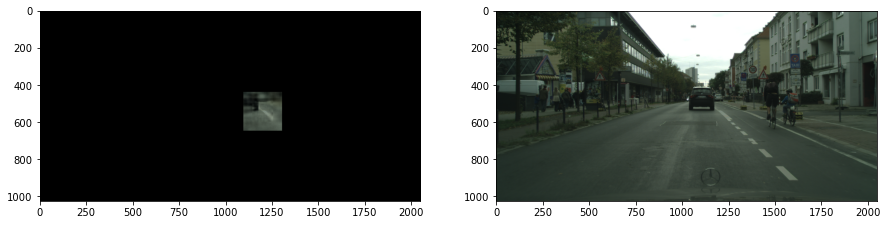

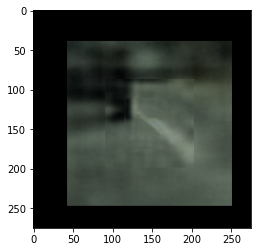

In [5]:
#20
#907 building == 11?

i = 654
print(i)
decoded_feature = demo_dataset.get_decoded_feature(i)
decoded_feature_original_image = demo_dataset.get_feature_original_image(i)
print(format_semantic_composition(demo_dataset.labels[i]))
print(demo_dataset.sceneIds[i])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.imshow(decoded_feature)
ax2.imshow(decoded_feature_original_image)

fig, ax = plt.subplots()
ax.imshow(decoded_feature[400:675, 1050:1325, :])

bremen_000303
stuttgart_000191


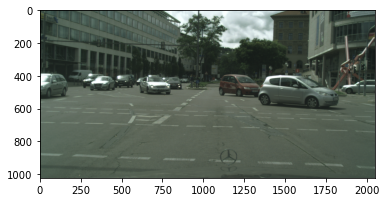

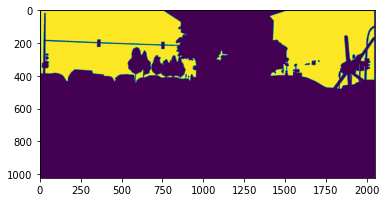

In [39]:
print(demo_dataset.sceneIds[i])
sceneID, (vis, sem) = cityscapes_helper.loadRandomScene()
print(sceneID)
fig, ax = plt.subplots()
ax.imshow(vis)
fig, ax = plt.subplots()
ax.imshow(sem == 11)

In [14]:
BV = dim_reduction.get_basis(32).basis_vectors
def show_basis(basis_vectors, offset):
    fig, axes = plt.subplots(1, 8, figsize=(12, 3))
    for i in range(8):
        axes[i].imshow(basis_vectors[offset + i].reshape((32, 32)))

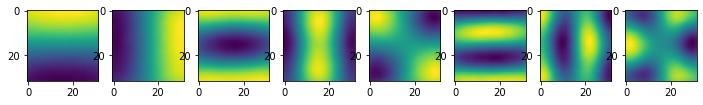

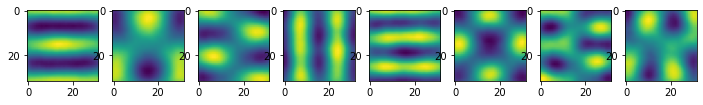

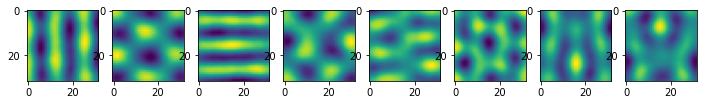

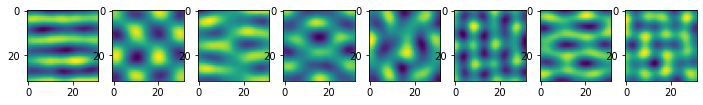

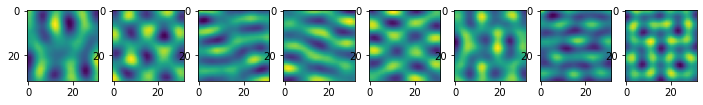

In [15]:
show_basis(BV, 0)
show_basis(BV, 8)
show_basis(BV, 16)
show_basis(BV, 24)
show_basis(BV, 32)